In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 671M/675M [00:05<00:00, 127MB/s]
100% 675M/675M [00:05<00:00, 137MB/s]


In [ ]:
!unzip "/content/cell-images-for-detecting-malaria.zip"

In [ ]:
import numpy
import os
import cv2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
infected = os.listdir("/content/cell_images/Parasitized")
infected_path = "/content/cell_images/Parasitized"
print("Length of infected data = ", len(infected), 'images')
uninfected = os.listdir("/content/cell_images/Uninfected")
uninfected_path = "/content/cell_images/Uninfected"
print("Length of uninfected data = ", len(uninfected), 'images')

Length of infected data =  13780 images
Length of uninfected data =  13780 images


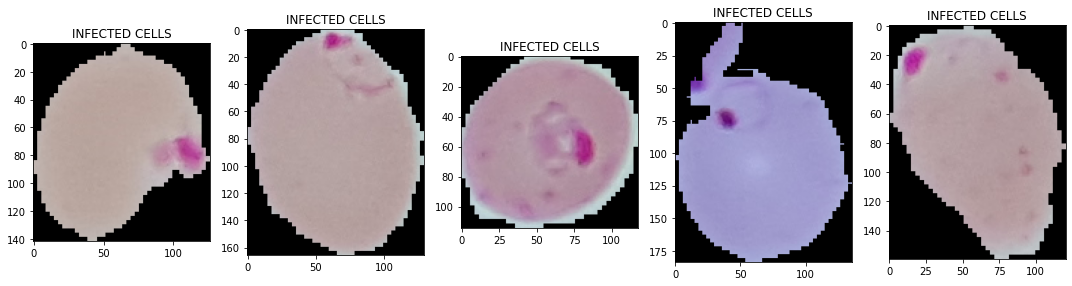

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.imread(infected_path + '/' + infected[i]))
    plt.title('INFECTED CELLS')
    plt.tight_layout()
plt.show()

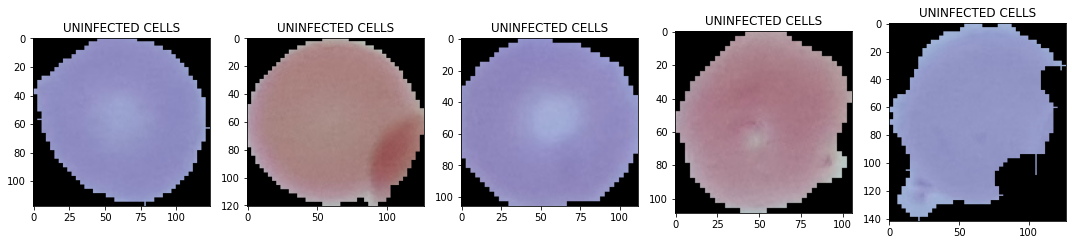

In [ ]:
# Uninfected cells
plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.imread(uninfected_path + '/' + uninfected[i]))
    plt.title('UNINFECTED CELLS')
    plt.tight_layout()
plt.show()

In [ ]:
img_shape = (130, 130, 3)
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.2)

In [ ]:
train = image_gen.flow_from_directory('/content/cell_images/cell_images',
                                     target_size = img_shape[:2],
                                     color_mode = 'rgb',
                                     batch_size = 32,
                                     class_mode = 'binary',
                                     subset = 'training',
                                     shuffle = True)

validation = image_gen.flow_from_directory('/content/cell_images/cell_images',
                                     target_size = img_shape[:2],
                                     color_mode ='rgb',
                                     batch_size = 32,
                                     class_mode = 'binary',
                                     subset = 'validation',
                                     shuffle = False)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [ ]:
train.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [ ]:
model = Sequential()


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape = (130,130,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
early = EarlyStopping(monitor='loss',patience=2,verbose=1)
model.metrics_names

[]

In [ ]:
model.fit(train,epochs=10,callbacks=[early])

Epoch 1/10
689/689 [==============================] - 632s 915ms/step - loss: 0.4328 - accuracy: 0.8077
Epoch 2/10
689/689 [==============================] - 626s 908ms/step - loss: 0.1920 - accuracy: 0.9424
Epoch 3/10
689/689 [==============================] - 627s 909ms/step - loss: 0.1766 - accuracy: 0.9484
Epoch 4/10
689/689 [==============================] - 626s 908ms/step - loss: 0.1635 - accuracy: 0.9500
Epoch 5/10
689/689 [==============================] - 626s 908ms/step - loss: 0.1602 - accuracy: 0.9507
Epoch 6/10
689/689 [==============================] - 628s 911ms/step - loss: 0.1554 - accuracy: 0.9526
Epoch 7/10
689/689 [==============================] - 631s 915ms/step - loss: 0.1527 - accuracy: 0.9528
Epoch 8/10
689/689 [==============================] - 631s 915ms/step - loss: 0.1501 - accuracy: 0.9536
Epoch 9/10
689/689 [==============================] - 631s 916ms/step - loss: 0.1499 - accuracy: 0.9545
Epoch 10/10
689/689 [==============================] - 637s 925m

In [ ]:
import pandas as pd

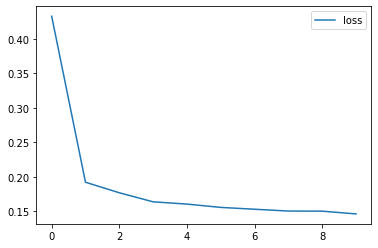

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss']].plot()

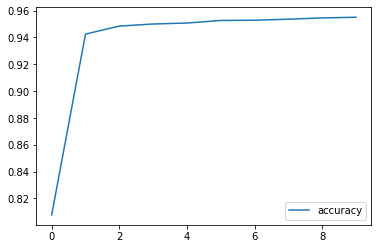

In [ ]:
# plot.title('Accuracy')
losses[['accuracy']].plot()

In [ ]:
predictions = model.predict(validation)
print(predictions)

[[1.93892665e-05]
 [1.09618595e-04]
 [7.95136111e-06]
 ...
 [9.33009565e-01]
 [8.76652241e-01]
 [9.30034161e-01]]


In [ ]:
model.save('rgb.h5')

In [ ]:
lmode=tf.keras.models.load_model('/content/Malaria_model.h5')

In [ ]:
print(lmode.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
from keras.preprocessing import image

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

(130, 130, 3)


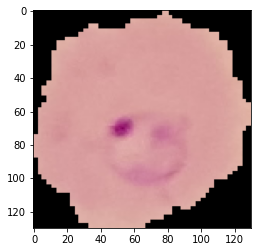

In [ ]:
image_path="/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"
img = image.load_img(image_path, target_size=(130, 130,3))
plt.imshow(img)
# im_gray = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
img_array = image.img_to_array(img)
print(img_array.shape)
img_batch = np.expand_dims(img_array, axis=0)

In [ ]:
# a=lmode.predict(img_array)
# print(type(img_array))
img_array.shape
# lmode.predict(img_array)

(130, 130, 3)

In [ ]:
lmode.predict(img_batch)

array([[0.]], dtype=float32)

(130, 130, 3)
(1, 130, 130, 3)


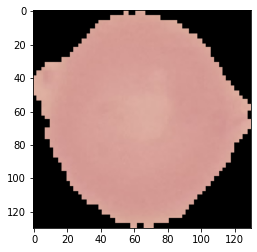

In [ ]:
image_path="/content/cell_images/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png"
img = image.load_img(image_path, target_size=(130, 130,3))
plt.imshow(img)
# im_gray = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
img_array = image.img_to_array(img)
print(img_array.shape)
img_batch_1 = np.expand_dims(img_array, axis=0)
print(img_batch.shape)

In [ ]:
lmode.predict(img_batch)

array([[0.]], dtype=float32)